# Laboratorio 3 - Clasificación de Malware

In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("VirusSample.csv")
df.sample(10)

,file,api,class
409,0c3f3ee137c490dc08d77be1d0cf520c4f2ab215,"RtlFreeThreadActivationContextStack,SHGetDeskt...",Virus
3758,5b5fb789d46888e4b288ef943eb5e50e4b4d7398,"LsaClose,atof,getenv,_lock_file,free,_configth...",Trojan
8514,9ef32a65afa370cd50613c4941787388ed2bed22,"LoadLibraryA,GetProcAddress,VirtualProtect,Vir...",Trojan
6917,aa981e8d6a0a32f4503965217089ba259449d602,"DeleteCriticalSection,LeaveCriticalSection,Ent...",Trojan
4853,54af2bb7b09cdfffa9d7929bf5330b9c9fcd8748,"MessageBoxA,wsprintfA,ExitProcess,GetModuleHan...",Trojan
8681,b632a26049e1d7bbc550e49d0a85ce30c0638790,"ExitProcess,GetEnvironmentStringsA,CloseHandle...",Backdoor
4328,ecc4be606ca8fcd5be3bf8ea8e3ca483101b1c78,"GlobalUnlock,GlobalLock,SetFilePointer,GetLast...",Trojan
7752,6f71749f47bcc768483ee2ad2365a29028f0a3e7,"Sleep,lstrlenA,CreateThread,VirtualFree,GetMod...",Trojan
1299,c8b104b5733b7c8dc3f3fa2f9f3d9cc608a41aec,"LoadLibraryA,Sleep,GetSystemTimeAsFileTime,Get...",Trojan
2493,8e057ffff8100e67317f699ffdb29888cb456a55,"ZwCreateTimer,AddAce,WSADuplicateSocketA,Regis...",Virus


Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64


<AxesSubplot: >

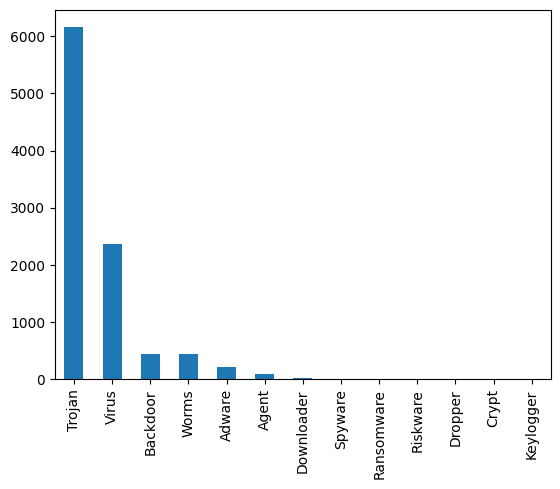

In [15]:
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

Como se puede observar, los datos no estan balanceados ya que hay muchos mas troyanos que cualquier otra categoría, por lo que para balancearla se necesitan quitar algunos de estos.

## Preprocesamiento

In [7]:
df = df.drop("file", axis=1)

In [8]:
body = np.array(df['api'])
target = np.array(df['class'])

In [11]:
def subCommas(s):
    s = re.sub(r' +','',s)
    s = re.sub(r',',' ',s)
    return s

In [12]:
cv = CountVectorizer(min_df=0.002, max_df=0.06)
cv_matrix = cv.fit_transform(body)
cv_matrix = cv_matrix.toarray()
vocabulario = cv.get_feature_names_out()
vocabulario.shape
bow = pd.DataFrame(cv_matrix, columns=vocabulario)
bow

,0_lockit,0exception,12,1_lockit,1exception,1type_info,2v0locale,__acrt_iob_func,__c_specific_handler,__cxxframehandler,...,yaxxz,zwclose,zwcreatefile,zwenumeratekey,zwopenkey,zwqueryfullattributesfile,zwquerysysteminformation,zwqueryvaluekey,zwreadfile,zwwritefile
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
over_sampler = RandomOverSampler(random_state=42)
body, target = over_sampler.fit_resample(bow, target)

In [14]:
print(body.shape, target.shape)

(79989, 1269) (79989,)


## Implementación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow, target, test_size=0.3, random_state=104, shuffle=True)

### Support vector machines

In [ ]:
model1 = SVC(gamma='auto')
model1 = model1.fit(X_train, y_train)

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
print('Matriz de confusión:\n', metrics.confusion_matrix(y_test, y_pred1))

In [ ]:
print(metrics.classification_report(y_test, y_pred1))

### Random forest

In [ ]:
y_train_enc = pd.get_dummies(y_train)
y_test_enc = pd.get_dummies(y_test)

In [ ]:
model2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model2.fit(X_train, y_train_enc)

In [ ]:
y_pred2 = model1.predict(X_test)

In [ ]:
print('Matriz de confusión:\n', metrics.confusion_matrix(y_test_enc, y_pred2))

In [ ]:
print(metrics.classification_report(y_test_enc, y_pred2))